In [1]:
#import pandas as pd
#data = pd.read_csv('US_Constructions_Dec21.csv')


In [2]:
#Sample 10000 instances from original data set and save as CSV in local directory
#df = data.sample(n=10000, random_state=1)
#df.to_csv('downsample.csv')

In [3]:
import pandas as pd
data = pd.read_csv("downsample.csv")

In [4]:
data

,Unnamed: 0,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,919165,C-937503,2,2021-11-22 20:53:00,2021-11-23 06:00:00,37.096828,-80.510505,37.095048,-80.502845,0.439699,...,False,False,False,False,False,False,Night,Night,Night,Night
1,5357712,C-5463882,2,2021-11-20 15:45:00,2021-11-20 17:53:15,33.479800,-112.012918,33.480463,-112.014642,0.109405,...,False,False,False,False,False,False,Day,Day,Day,Day
2,3332528,C-3398583,2,2021-12-19 20:02:28,2021-12-20 21:37:30,45.755917,-94.937866,45.758003,-94.938387,0.146301,...,False,False,False,False,False,False,Night,Night,Night,Night
3,1288930,C-1314728,1,2020-04-14 12:01:32,2020-04-15 12:16:32,41.655040,-70.984410,41.657210,-71.033780,2.553032,...,False,False,False,False,False,False,Day,Day,Day,Day
4,4868069,C-4964654,2,2021-08-18 17:42:00,2021-08-18 18:02:00,41.217026,-81.488965,41.207480,-81.485368,0.685552,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3243482,C-3307778,3,2019-04-02 20:00:00,2019-05-17 23:59:00,41.702179,-87.523682,NaN,NaN,7.290000,...,False,False,False,False,False,False,Night,Night,Day,Day
9996,123201,C-125598,2,2017-03-14 03:01:00,2017-03-19 02:59:00,34.058323,-118.197815,NaN,NaN,0.000000,...,False,False,False,False,False,False,Night,Night,Night,Night
9997,4429938,C-4517805,2,2020-05-28 07:01:46,2020-05-30 05:29:59,42.937860,-75.845550,42.929890,-75.850930,0.614255,...,False,False,True,False,False,False,Day,Day,Day,Day
9998,3275285,C-3340218,2,2020-09-24 22:27:30.000000000,2020-09-24 23:55:30.000000000,45.091527,-93.441714,45.095677,-93.449054,0.458690,...,False,False,False,False,False,False,Night,Night,Night,Night


Run each line below one at a time in command line or terminal

 conda create -n env_pytorch python=3.6
 conda activate env_pytorch
 pip install torchvision 


In [5]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [6]:
# Casting the start and end times as date time
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])

# Casting the sunset/twilight predictors as boolean
data['Sunrise_Sunset'] = data['Sunrise_Sunset'].map({'Night': True, 'Day': False})
data['Civil_Twilight'] = data['Civil_Twilight'].map({'Night': True, 'Day': False})
data['Nautical_Twilight'] = data['Nautical_Twilight'].map({'Night': True, 'Day': False})
data['Astronomical_Twilight'] = data['Astronomical_Twilight'].map({'Night': True, 'Day': False})

# Creating calculated values
data['start_year'] = data['Start_Time'].dt.year
data['start_month'] = data['Start_Time'].dt.month
data['start_hour'] = data['Start_Time'].dt.hour + data['Start_Time'].dt.minute/60
data['diff_minutes'] = data['End_Time'] - data['Start_Time']
data['diff_minutes'] = data['diff_minutes']/np.timedelta64(1, 'm')

In [7]:
# Limiting the dataset to only boolean, numeric and date time values
df_limited = data[['start_year', 'start_month', 'start_hour', 'diff_minutes', 'Start_Lat',
                   'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)',
                   'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
                   'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing',
                   'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
                   'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
                   'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']]

In [8]:
# Lets do min/max scaling!
x = df_limited.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_scaled = pd.DataFrame(x_scaled, columns=df_limited.columns)

In [9]:
# Lets add back in the severity, mapped to more severe and less severe:
df_scaled['Severity'] = data['Severity'].map({1: True, 2: True, 3: False, 4: False})

In [ ]:
# Checking the types
# print(df_scaled.dtypes)

In [10]:
# Lets fill in any missing values with the column averages
column_means = df_scaled.mean()
df_scaled = df_scaled.fillna(column_means)


In [11]:
# Lets split some training and some test data
train, test = train_test_split(df_scaled, test_size=0.2)

x_train = train[['start_year', 'start_month', 'start_hour', 'diff_minutes', 'Start_Lat',
                 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)',
                 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
                 'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing',
                 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
                 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
                 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']].values

y_train = train[['Severity']].values

x_test = test[['start_year', 'start_month', 'start_hour', 'diff_minutes', 'Start_Lat',
               'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)',
               'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
               'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Bump', 'Crossing',
               'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
               'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
               'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']].values

y_test = test[['Severity']].values


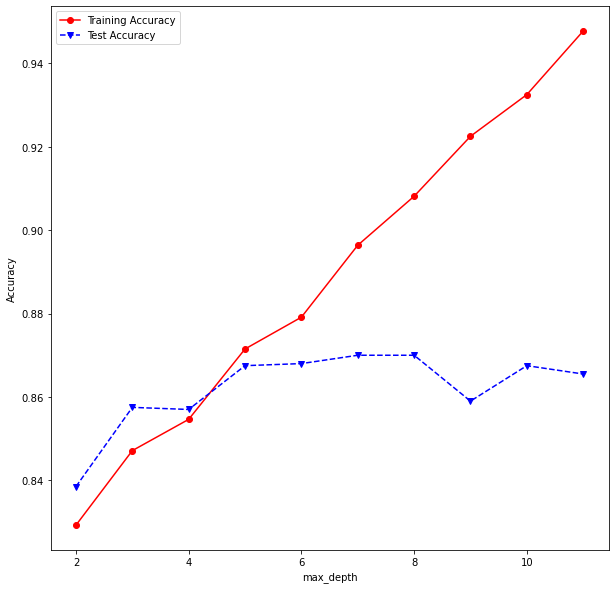

Decision Tree Accuracy on test data is 0.86
Decision Tree Precision on test data is 0.91
Decision Tree Recall on test data is 0.92
Decision Tree F1 on test data is 0.92


In [12]:
# Lets try a Decision Tree
C = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
DTCtrainAcc = []
DTCtestAcc = []

for param in C:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=param)
    clf.fit(x_train, y_train)
    Y_predTrain = clf.predict(x_train)
    Y_predTest = clf.predict(x_test)
    DTCtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    DTCtestAcc.append(accuracy_score(y_test, Y_predTest))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

plt.plot(C, DTCtrainAcc, 'ro-', C, DTCtestAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

clf = DecisionTreeClassifier(criterion='entropy', max_depth=9)
clf = clf.fit(x_train, y_train)

predY = clf.predict(x_test)
predictions = pd.concat([test, pd.Series(predY, name='Predicted Class')], axis=1)

print('Decision Tree Accuracy on test data is %.2f' % (accuracy_score(y_test, predY)))
print('Decision Tree Precision on test data is %.2f' % (precision_score(y_test, predY)))
print('Decision Tree Recall on test data is %.2f' % (recall_score(y_test, predY)))
print('Decision Tree F1 on test data is %.2f' % (f1_score(y_test, predY)))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

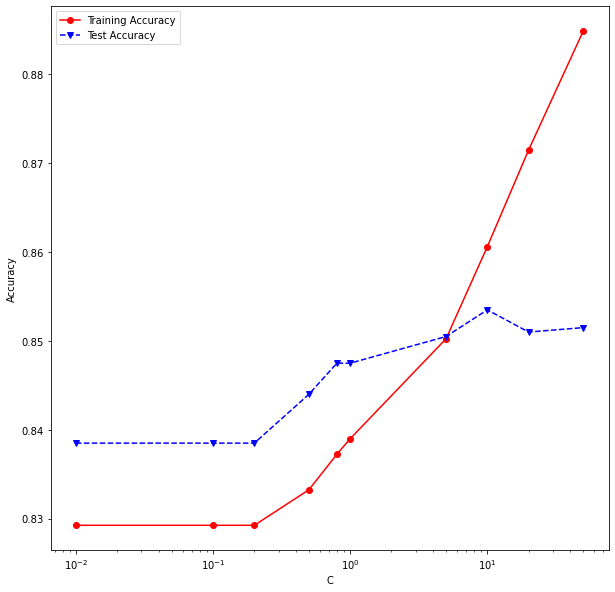

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy on test data is 0.85
Precision on test data is 0.87
Recall on test data is 0.97
F1_score on test data is 0.92


In [13]:
# Lets try an SVM
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = SVC(C=param, kernel='rbf', gamma='scale')
    clf.fit(x_train, y_train)
    Y_predTrain = clf.predict(x_train)
    Y_predTest = clf.predict(x_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

fig,  ax = plt.subplots(1, 1, figsize=(10, 10))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
plt.show()

clf = SVC(C=20, kernel='rbf', gamma='scale')
clf.fit(x_train, y_train)
Y_pred = clf.predict(x_test)
print('Accuracy on test data is %.2f' % (accuracy_score(y_test, Y_pred)))
print('Precision on test data is %.2f' % precision_score(y_test, Y_pred) )
print('Recall on test data is %.2f' % recall_score(y_test, Y_pred) )
print('F1_score on test data is %.2f' % f1_score(y_test, Y_pred) )